In [1]:
import numpy as np
import scipy.optimize as op
import scipy.stats as ss
import matplotlib.pyplot as plt
import ARTsampler
import emcee
import corner

%matplotlib inline

In [2]:
# a posterior
_variances = np.array([0.13, 2.])**2
_corr = 0.3
_Sigma = np.diag(_variances)
_w = 0.5

def lnpost(x):
    return np.log(_w*ss.multivariate_normal.pdf(x, mean=np.array([0.1, 4]), cov=_Sigma) + \
        (1-_w)*ss.multivariate_normal.pdf(x, mean=np.array([0.5, 4]), cov=_Sigma))
        
def neg_lnpost(x):
    return -lnpost(x)

In [3]:
sampler = ARTsampler.ARTsampler(lnpost, lnprob_args=(), x0=[0,0], temperature=4,
                                quiet=False, verbose=True)

Running the minimizer
      fun: 1.1748026090852117
 hess_inv: array([[ 1.85709101e-02, -1.31082387e-06],
       [-1.31082387e-06,  3.99932279e+00]])
      jac: array([-1.78813934e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([0.10381292, 3.99999997])
Optimizing G on update 1
      fun: 14525.45132877626
 hess_inv: array([[1.99282644e-16]])
      jac: array([-0.24676782])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 91
      nit: 27
     njev: 79
   status: 2
  success: False
        x: array([-1.94904274])


In [4]:
pos = np.array([0.3, 3]) + 1e-4 * np.random.randn(32, 2)
nwalkers, ndim = pos.shape

Esampler = emcee.EnsembleSampler(nwalkers, ndim, sampler.logpdf)
Esampler.run_mcmc(pos, 3000)
samples = Esampler.get_chain(flat=True)

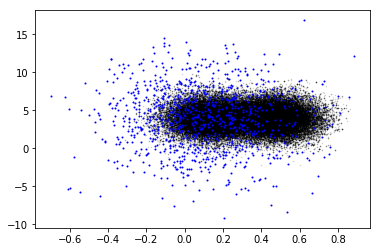

In [5]:
plt.scatter(samples[:,0], samples[:,1], c='k', alpha=0.2, s=0.2)
plt.scatter(sampler.g[:,0], sampler.g[:,1], c="blue", s=1)

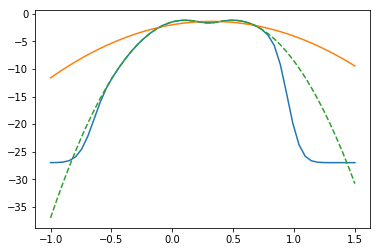

In [6]:
xs = np.linspace(-1, 1.5)
xs = np.vstack((xs,xs)).T
xs[:,1] = 4
lnG = np.array([sampler.G.logpdf(xi) for xi in xs])
lnp = np.array([sampler.logpdf(xi) for xi in xs]) - lnG
TRUTH = np.array([lnpost(xi) for xi in xs])
plt.plot(xs[:,0], lnp)
plt.plot(xs[:,0], lnG)
plt.plot(xs[:,0], TRUTH, "--")

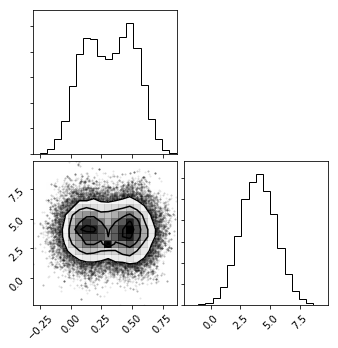

In [7]:
fig = corner.corner(samples)

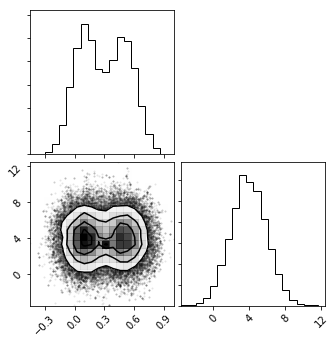

In [8]:
if True:
    Esampler2 = emcee.EnsembleSampler(nwalkers, ndim, lnpost)
    Esampler2.run_mcmc(pos, 3000)
    samples = Esampler2.get_chain(flat=True)
    fig = corner.corner(samples)